# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [69]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [70]:
# Open the file in read mode ('r')
with open('mark_twain.txt', 'r', encoding='utf-8') as f:
    # Step 2: Read the content of the file
    text = f.read()

# Use a fraction to get only part of the text
fraction = 0.1  # Set to 0.1 to load the first 10% of the file
text = text[:int(fraction * len(text))]

# Now the entire content of the text file is stored in the 'text' variable
print(text[:1000])  # Print the first 1000 characters to see a sample


The Project Gutenberg EBook of The Prince and The Pauper, Complete by
Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org

Title: The Prince and The Pauper, Complete

Author: Mark Twain (Samuel Clemens)

Release Date: August 20, 2006 [EBook #1837]
Last Updated: February 19, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRINCE AND THE PAUPER ***

Produced by David Widger. The earliest PG edition was prepared by Les
Bowler




THE PRINCE AND THE PAUPER

by Mark Twain

The Great Seal

I will set down a tale as it was told to me by one who had it of his
father, which latter had it of HIS father, this last having in like
manner had it of HIS father--and so on, back and still back, three
hundred years and more, the fat

In [71]:
# def download_file(url, file_path):
#     import requests
#     r = requests.get(url)
#     with open(file_path, 'wb') as f:
#         f.write(r.content)

# def load_dataset(file_path, fraction=1.0):
#     with open(file_path, 'r', encoding='utf-8') as f:
#         raw_text = f.read()
#     return raw_text[:int(fraction * len(raw_text))]

# dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

# download_file(f'https://github.com/UofT-DSI/deep_learning/raw/main/assignments/downloaded_books/' + dataset, dataset)

# # Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
# text = load_dataset(dataset, fraction=0.1)

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [72]:
# Your code here
# Step 1: Print the first 1000 characters
print("First 1000 characters of the dataset:\n")
print(text[:1000])

# Step 2: Report the size of the dataset
dataset_size = len(text)
print(f"\nSize of the dataset: {dataset_size} characters")

# Step 3: Report the number of unique characters in the dataset
unique_chars = set(text)
print(f"Number of unique characters in the dataset: {len(unique_chars)}")


First 1000 characters of the dataset:


The Project Gutenberg EBook of The Prince and The Pauper, Complete by
Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org

Title: The Prince and The Pauper, Complete

Author: Mark Twain (Samuel Clemens)

Release Date: August 20, 2006 [EBook #1837]
Last Updated: February 19, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRINCE AND THE PAUPER ***

Produced by David Widger. The earliest PG edition was prepared by Les
Bowler




THE PRINCE AND THE PAUPER

by Mark Twain

The Great Seal

I will set down a tale as it was told to me by one who had it of his
father, which latter had it of HIS father, this last having in like
manner had it of HIS father--and so on, back and still back

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [73]:
from keras.preprocessing.text import Tokenizer

# Your code here
# Step 1: Convert text to lower case 
text = text.lower()

# Step 2: Set up the Tokenizer
vocab_size = 5000  # You can adjust this based on the most common words.
oov_token = "<OOV>"  # This token will represent out-of-vocabulary words.
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

# Step 3: Fit the tokenizer on the text
tokenizer.fit_on_texts([text])

# Step 4: Convert the text to sequences
sequences = tokenizer.texts_to_sequences([text])

# Let's explore the tokenized output
print(f"First 10 tokens in the sequence: {sequences[0][:10]}")

First 10 tokens in the sequence: [2, 163, 151, 929, 4, 2, 84, 3, 2, 627]


If everything worked, the following line should show you the first 10 words in the vocabulary:

In [74]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('in', 7), ('was', 8), ('he', 9), ('it', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [75]:
import numpy as np

# Step 1: Define SEQ length 
SEQ_LENGTH = 20 # Choose an appropriate sequence length

# Step 2: Generate Training Sequences
sequences = sequences[0]  # Flatten the nested list
input_sequences = []
target_words = []

# Iterate through the entire list of tokens to create sequences of length SEQ_LENGTH
for i in range(SEQ_LENGTH, len(sequences)):
    # Extract sequence of SEQ_LENGTH tokens
    input_sequence = sequences[i - SEQ_LENGTH:i]
    # Append input sequence to the list of input sequences
    input_sequences.append(input_sequence)
    # The target word is the token immediately after the sequence
    target_words.append(sequences[i])

# Convert lists to numpy arrays for training
input_sequences = np.array(input_sequences)
target_words = np.array(target_words)

# Print a sample
print("Sample Input Sequence:", input_sequences[0])
print("Target Word for the Sequence:", target_words[0])

Sample Input Sequence: [   2  163  151  929    4    2   84    3    2  627 1216   24  582  776
 2261 2747   22  929   20   16]
Target Word for the Sequence: 2


Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [76]:
if len(input_sequences) > 0 and len(target_words) > 0:
    print(f'Sequence: {input_sequences[0]}\nTarget: {target_words[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in input_sequences[0]]} -> {tokenizer.index_word[target_words[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [   2  163  151  929    4    2   84    3    2  627 1216   24  582  776
 2261 2747   22  929   20   16]
Target: 2
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'prince', 'and', 'the', 'pauper', 'complete', 'by', 'mark', 'twain', 'samuel', 'clemens', 'this', 'ebook', 'is', 'for'] -> the


And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [77]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(input_sequences)
    y = np.array(target_words)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if oov_token in tokenizer.word_index:
        mask = y != tokenizer.word_index[oov_token]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=vocab_size)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (171642, 20)
y_train shape: (171642, 5000)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [78]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Step 1: Set Model Parameters
vocab_size = 5000  # Size of the vocabulary
embedding_dim = 100  # Number of dimensions for word embeddings
lstm_units = 150  # Number of units in LSTM layer
seq_length = SEQ_LENGTH  # The length of input sequences

# Step 2: Define the Model Architecture
model = Sequential()

# Add Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length))

# Add LSTM Layer
model.add(LSTM(units=lstm_units, return_sequences=False))  # Set return_sequences=False to pass only final output to the next layer

# Add Dense Output Layer with Softmax Activation
model.add(Dense(vocab_size, activation='softmax'))

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 100)           500000    
                                                                 
 lstm_5 (LSTM)               (None, 150)               150600    
                                                                 
 dense_3 (Dense)             (None, 5000)              755000    
                                                                 
Total params: 1,405,600
Trainable params: 1,405,600
Non-trainable params: 0
_________________________________________________________________


## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_your explanation here_

We use categorical_crossentropy because the model’s output is a probability distribution over multiple classes (words in the vocabulary). This loss function helps compare the predicted probability distribution to the true one-hot encoded labels, allowing the model to learn effectively.

Adam is an adaptive optimizer that combines the advantages of SGD with momentum and RMSProp. It automatically adjusts the learning rate during training, which helps speed up convergence and often results in a better final model. The learning rate is set to 0.001, a commonly used value for initial experiments.

In [79]:
# Your code here

from keras.optimizers import Adam

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Using Adam optimizer with default learning rate
    metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [80]:
# Your code here

# Train the model for 5 epochs with a batch size of 128
history = model.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=128, 
    validation_data=(X_val, y_val)
)

# Print a message after training is complete
print("Model training complete!")

Epoch 1/5
1341/1341 [==============================] - 123s 88ms/step - loss: 6.3295 - accuracy: 0.0825 - val_loss: 6.0249 - val_accuracy: 0.1056
Epoch 2/5
1341/1341 [==============================] - 118s 88ms/step - loss: 5.8342 - accuracy: 0.1144 - val_loss: 5.7425 - val_accuracy: 0.1175
Epoch 3/5
1341/1341 [==============================] - 129s 96ms/step - loss: 5.5495 - accuracy: 0.1299 - val_loss: 5.5563 - val_accuracy: 0.1332
Epoch 4/5
1341/1341 [==============================] - 119s 89ms/step - loss: 5.3136 - accuracy: 0.1441 - val_loss: 5.4168 - val_accuracy: 0.1409
Epoch 5/5
1341/1341 [==============================] - 118s 88ms/step - loss: 5.1161 - accuracy: 0.1528 - val_loss: 5.3285 - val_accuracy: 0.1484
Model training complete!


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

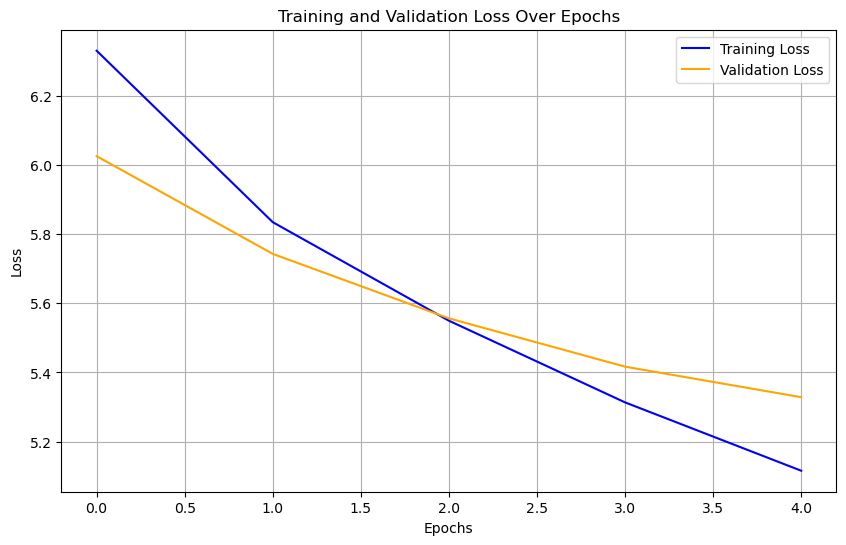

In [81]:
import matplotlib.pyplot as plt

# Your code here

# Extract the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [82]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Helper function to get predicted word from the model
def get_predicted_word(model, sequence, vocab_size, temperature=1.0):
    """
    Get the predicted word from the model with a bit of randomness (temperature).
    """
    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)
    
    # Apply temperature to predictions to introduce randomness
    yhat = yhat.flatten()
    yhat = np.log(yhat + 1e-8) / temperature
    exp_preds = np.exp(yhat)
    yhat = exp_preds / np.sum(exp_preds)

    # Get the index of the predicted word by sampling from the distribution
    if len(yhat) != vocab_size:
        vocab_size = len(yhat)
    predicted_index = np.random.choice(range(vocab_size), p=yhat)
    
    return predicted_index

# Function to generate new text using the trained model
def generate_text(model, tokenizer, seed_text, max_sequence_len, num_words_to_generate=50):
    """
    Generate new text using the trained model.
    
    Parameters:
    - model: The trained RNN model.
    - tokenizer: The tokenizer used to pre-process the text data.
    - seed_text: The initial text the model will use to generate new text.
    - max_sequence_len: The maximum length of the sequence used to generate new text.
    - num_words_to_generate: The number of words to generate.
    
    Returns:
    - The generated text.
    """
    # Start with the seed text
    generated_text = seed_text
    
    # Generate num_words_to_generate words
    for _ in range(num_words_to_generate):
        # Tokenize the seed text
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        
        # Pad the sequence to match the max_sequence_len
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        
        # Predict the next word
        predicted_index = get_predicted_word(model, token_list, len(tokenizer.word_index) + 1)
        
        # Stop if the predicted word is the out-of-vocabulary token
        if predicted_index == tokenizer.word_index.get('<OOV>'):
            break
        
        # Get the word corresponding to the predicted index
        predicted_word = tokenizer.index_word.get(predicted_index, '')
        
        # Append the predicted word to the generated text
        generated_text += ' ' + predicted_word
        
        # Optionally, print each word as it is generated (for a "gpt-style" experience)
        print(predicted_word, end=' ', flush=True)
    
    return generated_text


In [83]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

my few day i must know me affairs ” i could had been warm  i am innocent and hold to illustrious thing to him that it would hear me it is as safe of my of state ” a father’s massed of treachery upon them another years and decaying eyes 

'hamlet my few day i must know me affairs ” i could had been warm \xa0i am innocent and hold to illustrious thing to him that it would hear me it is as safe of my of state ” a father’s massed of treachery upon them another years and decaying eyes'

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [84]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.initializers import Constant
import numpy as np
import requests, zipfile, os
from io import BytesIO

# Function to download and extract GloVe embeddings
def download_glove_embeddings():
    """
    Downloads and extracts GloVe embeddings from Stanford's website.
    """
    url = "https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip"
    response = requests.get(url)
    if response.status_code == 200:
        with zipfile.ZipFile(BytesIO(response.content)) as zfile:
            zfile.extractall("./glove")
            print("GloVe embeddings downloaded and extracted.")
    else:
        print("Failed to download GloVe embeddings.")

# Example usage to download GloVe embeddings
download_glove_embeddings()

KeyboardInterrupt: 

In [86]:
def load_glove_embeddings(filepath='glove/glove.6B.100d.txt'):
    """
    Load the pre-trained GloVe embeddings from the specified file.
    
    Parameters:
    - filepath: The path to the GloVe file.
    
    Returns:
    - embeddings_index: A dictionary mapping words to their GloVe vector representations.
    """
    embeddings_index = {}
    try:
        with open(filepath, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
        print(f'Found {len(embeddings_index)} word vectors.')
    except FileNotFoundError:
        print(f"'{filepath}' File not found. Please make sure you have run the previous cell to download GloVe embeddings.")
    
    return embeddings_index

# Example usage to load GloVe embeddings
embeddings_index = load_glove_embeddings()

Found 400000 word vectors.


In [ ]:
# # Load the pre-trained embeddings
# embeddings_index = {}
# try:
#     with open('glove.6B.100d.txt', encoding='utf-8') as f:
#         for line in f:
#             values = line.split()
#             word = values[0]
#             coefs = np.asarray(values[1:], dtype='float32')
#             embeddings_index[word] = coefs
#     print(f'Found {len(embeddings_index)} word vectors.')
# except FileNotFoundError:
#     print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

In [87]:
# Check if VOCAB_SIZE is set
if vocab_size is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((vocab_size, 100))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [88]:
# Check if VOCAB_SIZE is set
if vocab_size is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        vocab_size, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [106]:
# Define a new model and train it

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

def build_refined_model(vocab_size, max_sequence_len, embedding_dim=100, lstm_units=150, dropout_rate=0.2, embedding_matrix=None):
    """
    Build a refined RNN model with options for pre-trained embeddings, additional LSTM layers, and dropout.
    
    Parameters:
    - vocab_size: The size of the vocabulary.
    - max_sequence_len: The maximum length of the input sequences.
    - embedding_dim: The dimension of the embedding layer.
    - lstm_units: The number of units in the LSTM layer.
    - dropout_rate: The dropout rate to apply after LSTM layers.
    - embedding_matrix: Pre-trained embedding weights (optional).
    
    Returns:
    - The compiled Keras model.
    """
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
    
    model = Sequential()
    
    # Add Embedding layer (using pre-trained embeddings if provided)
    if embedding_matrix is not None:
        model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=max_sequence_len, 
                            embeddings_initializer=Constant(embedding_matrix), 
                            trainable=False))
    else:
        model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=max_sequence_len))
    
    # Add LSTM layer with dropout
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Dropout(rate=dropout_rate))
    
    # Add another LSTM layer
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(rate=dropout_rate))
    
    # Add Flatten layer
    model.add(Flatten())


    # Add Dense output layer with softmax activation
    model.add(Dense(vocab_size, activation='softmax'))
    
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Example usage to build and compile a refined model
vocab_size = len(tokenizer.word_index) + 1
refined_model = build_refined_model(vocab_size, SEQ_LENGTH, embedding_dim=100, lstm_units=150, dropout_rate=0.2)
refined_model.summary()

# Your code here

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 100)           1401100   
                                                                 
 lstm_13 (LSTM)              (None, 20, 150)           150600    
                                                                 
 dropout_10 (Dropout)        (None, 20, 150)           0         
                                                                 
 lstm_14 (LSTM)              (None, 150)               180600    
                                                                 
 dropout_11 (Dropout)        (None, 150)               0         
                                                                 
 flatten_2 (Flatten)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 14011)            

In [108]:
history = refined_model.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=128, 
    validation_data=(X_val, y_val)
)

# Print a message after training is complete
print("Model training complete!")

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\david\AppData\Local\Temp\ipykernel_19656\2012194820.py", line 1, in <module>
      history = refined_model.fit(
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [128,14011] and labels shape [640000]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_111265]

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.